In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
#read csv file
df = pd.read_csv('analysis_test_data.csv') 
df.tail()

,marketing_source,shopper_creation_timestamp_pst,shopper_id,number_calls_answered,number_calls_longer_than_200seconds,partner_revenue,marketing_cost,policies_sold,policy_value
1048570,U,2018-07-15 6:26,6237276,3,0,0.0,1.87,0,0.0
1048571,AZ,2018-07-18 8:33,6330650,1,0,3.1,9.60,0,0.0
1048572,AW,2018-07-20 11:58,6401348,3,0,0.0,0.00,0,0.0
1048573,Unknown,2018-07-24 7:51,6491033,0,0,0.0,0.00,0,0.0
1048574,U,2018-07-24 12:59,6501928,0,0,0.0,2.35,0,0.0


In [72]:
df["shopper_creation_timestamp_pst"] = pd.to_datetime(df["shopper_creation_timestamp_pst"])
fcols = ["marketing_cost", "policies_sold", "policy_value", "partner_revenue"]
df[fcols] = df[fcols].astype(float)
df_sorted = df.sort_values(by="shopper_creation_timestamp_pst")
#fig = px.line(df_sorted, x="shopper_creation_timestamp_pst", y="policies_sold", title='')


In [73]:
#unique shopper id count
print(df["shopper_id"].unique().shape)
#Checking for repeating shoppers
print((df["shopper_id"].value_counts()>1).any())

(1048575,)
False


Marketing cost per visitor:  5.489363889087576
Sales return per call:  8.404213893140689
Sales return per answered call:  15.59170734482069


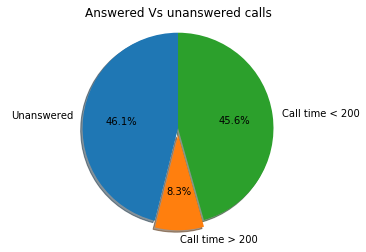

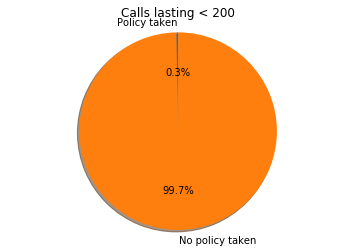

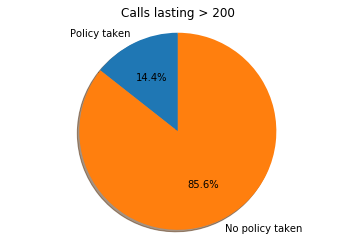

In [74]:
#unique shoppers count
tunique_shoppers = df["shopper_id"].unique().shape[0]

n_calls_ans = (df[df["number_calls_answered"]>=1]).to_numpy().shape[0]
cond = (df["number_calls_answered"]>0) & (df["number_calls_longer_than_200seconds"]>0)
n_calls_g200 = df[cond].shape[0]
n_calls_l200 = (n_calls_ans-n_calls_g200)
n_uans_calls = (tunique_shoppers - n_calls_ans)

t_polrev = df["policy_value"].sum()
t_parrev = df["partner_revenue"].sum()
t_mcost  = df["marketing_cost"].sum()

print("Marketing cost per visitor: ", t_mcost/tunique_shoppers)
print("Sales return per call: ", (t_polrev+t_parrev)/tunique_shoppers)
print("Sales return per answered call: ", (t_polrev+t_parrev)/n_calls_ans)

labels = 'Unanswered', 'Call time > 200', 'Call time < 200'
sizes = [n_uans_calls, n_calls_g200, n_calls_l200]
explode = (0, 0.07, 0)  

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
ax.set_title('Answered Vs unanswered calls')

calls_l200_tp = (df["number_calls_answered"]>0) & (df["number_calls_longer_than_200seconds"]==0) & (df["policies_sold"]>0)
calls_g200_tp = (df["number_calls_answered"]>0) & (df["number_calls_longer_than_200seconds"]>0) & (df["policies_sold"]>0)

n_calls_l200_tp = df[calls_l200_tp].shape[0]
n_calls_g200_tp = df[calls_g200_tp].shape[0]
labels = 'Policy taken', 'No policy taken'
sizes = [n_calls_l200_tp, abs(n_calls_l200-n_calls_l200_tp)]
explode = (0, 0)  # only "explode" the 2nd slice 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Calls lasting < 200')
plt.show()


labels = 'Policy taken', 'No policy taken'
sizes = [n_calls_g200_tp, abs(n_calls_g200-n_calls_g200_tp)]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Calls lasting > 200')
plt.show()


In [75]:
#Unique marketing sources
umsources = df["marketing_source"].unique()

In [76]:
n_ans_list = []
n_uans_list= []
n_tp_list = []
for src in umsources:
    tcond1 = (df["number_calls_answered"]>0) & (df["marketing_source"] == src)
    tcond2 = (df["number_calls_answered"]==0) & (df["marketing_source"] == src)
    tcond3 = (df["policies_sold"]>0) & (df["marketing_source"] == src)
    n_ans_list.append(df[tcond1].shape[0])
    n_uans_list.append(df[tcond2].shape[0])
    n_tp_list.append(df[tcond3].shape[0])
    

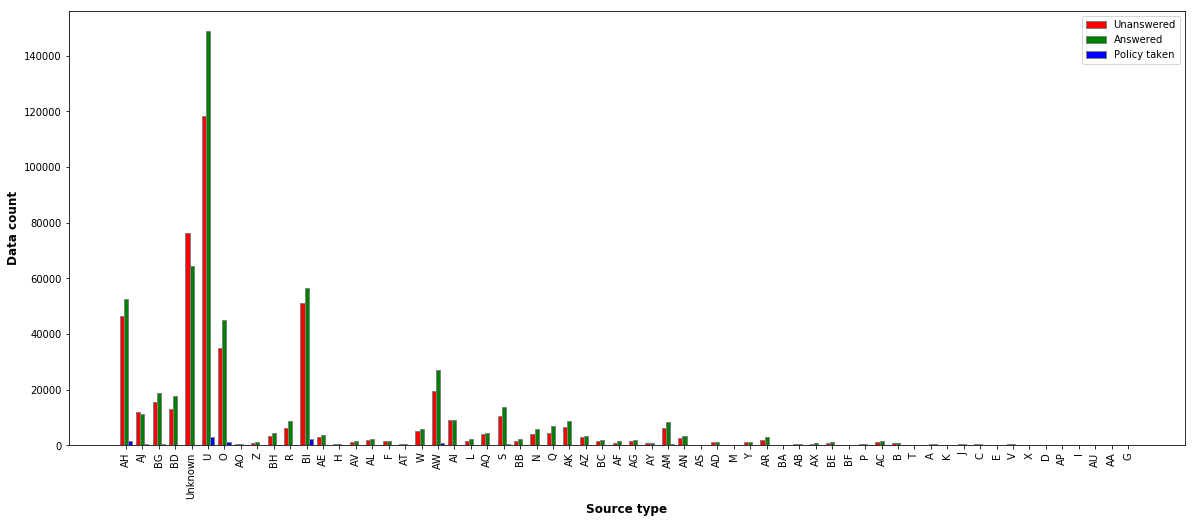

In [77]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(n_uans_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

 
# Make the plot
plt.bar(br1, n_uans_list, color ='r', width = barWidth,
        edgecolor ='grey', label ='Unanswered')
plt.bar(br2, n_ans_list, color ='g', width = barWidth,
        edgecolor ='grey', label ='Answered')
plt.bar(br3, n_tp_list, color ='b', width = barWidth,
        edgecolor ='grey', label ='Policy taken')
 
# Adding Xticks
plt.xlabel('Source type', fontweight ='bold', fontsize = 12)
plt.ylabel('Data count', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(n_ans_list))],
        umsources)
plt.xticks(rotation='vertical')
 
plt.legend()
plt.show()


In [78]:
#Source based on various measures

In [79]:
n_ans_list  = np.array(n_ans_list)
n_uans_list= np.array(n_uans_list)
n_tp_list = np.array(n_tp_list)

In [80]:
call_hitp = n_ans_list/(n_ans_list+n_uans_list)*100
pol_hitp = n_tp_list/n_ans_list * 100
inc_order = np.argsort(pol_hitp)[::-1]

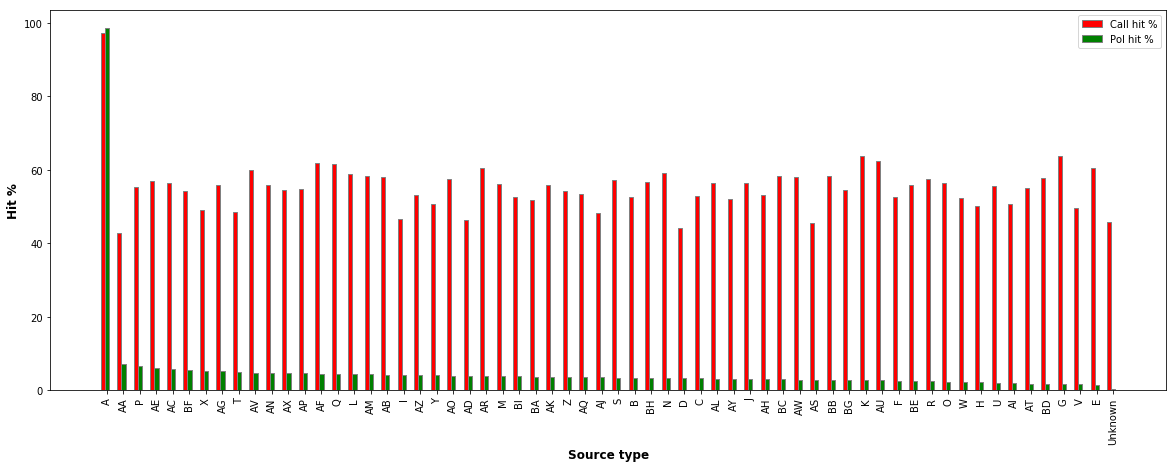

In [81]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 7))
  
# Set position of bar on X axis
br1 = np.arange(len(call_hitp))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, call_hitp[inc_order], color ='r', width = barWidth,
        edgecolor ='grey', label ='Call hit %')
plt.bar(br2, pol_hitp[inc_order], color ='g', width = barWidth,
        edgecolor ='grey', label ='Pol hit %')
 
# Adding Xticks
plt.xlabel('Source type', fontweight ='bold', fontsize = 12)
plt.ylabel('Hit %', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(n_ans_list))],
        umsources[inc_order])
plt.xticks(rotation='vertical')
 
plt.legend()
plt.show()



In [82]:
#Used sources over time
period = '2D'
df_agg = df_sorted.groupby(pd.Grouper(key='shopper_creation_timestamp_pst', freq=period))

In [83]:
def ret_stat(df_agg):
    cnt_src_dict = dict((el,[]) for el in umsources)
    tlist = []
    mc_list=[0]
    partnerr_list=[0]
    policyr_list=[0]
    for name, group in df_agg["marketing_source"]:
        tlist.append(name)
        for val, cnt in group.value_counts().iteritems():
            cnt_src_dict[val].append(cnt)

    for name, group in df_agg["marketing_cost"]:
            mc_list.append(mc_list[-1]+group.sum())
    mc_list = mc_list[1:]

    for name, group in df_agg["partner_revenue"]:
            partnerr_list.append(partnerr_list[-1]+group.sum())
    partnerr_list = partnerr_list[1:]

    for name, group in df_agg["policy_value"]:
            policyr_list.append(policyr_list[-1]+group.sum())
    policyr_list = policyr_list[1:]
    total_rev = np.array(partnerr_list) + np.array(policyr_list) - np.array(mc_list)
    return (np.array(tlist), np.array(mc_list), np.array(partnerr_list), np.array(policyr_list), np.array(total_rev), cnt_src_dict)

In [84]:
(tlist, mc_list, partnerr_list, policyr_list, total_rev, cnt_src_dict) = ret_stat(df_agg)

In [85]:
#Revenue to cost ratios
ratio_dict = dict((el,0) for el in umsources)
for src in umsources:
    tcond1 = (df["marketing_source"] == src)
    parev = df[tcond1]["partner_revenue"].sum()
    porev = df[tcond1]["policy_value"].sum()
    mcost = df[tcond1]["marketing_cost"].sum()
    ratio_dict[src]=(parev+porev)/mcost
print(ratio_dict)
discard_src=[]
for key in ratio_dict:
    if ratio_dict[key]<1:
        discard_src.append(key)
print(discard_src)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in double_scalars



{'AH': inf, 'AJ': 1.8541602691513257, 'BG': 1.2036970936781124, 'BD': 875.0935867551252, 'Unknown': inf, 'U': 1.6870174825491446, 'O': 1.184351913241657, 'AO': 1.7185393022223039, 'Z': 1.2695628351627293, 'BH': 1.6522491521496319, 'R': 1.2016213234247317, 'BI': 1.4469455794363006, 'AE': 0.7236940344212393, 'H': 0.6447882817693775, 'AV': 1.2398051086849748, 'AL': 0.9912828979856604, 'F': 1.5828494954471335, 'AT': 0.5072234641102978, 'W': 0.6957346576862012, 'AW': 0.8695999894317873, 'AI': 1.1428734169447936, 'L': 1.4266417623303014, 'AQ': 1.1366701395144803, 'S': 1.0072644496724996, 'BB': 1.3601788210256511, 'N': 32.02166388888889, 'Q': 1.2499165695848053, 'AK': 1.1478329591859122, 'AZ': 1.2677798157253626, 'BC': 0.7717271185232699, 'AF': 1.0364921933180813, 'AG': 0.6963861561759312, 'AY': 2.2438487284434108, 'AM': 1.2399491711499655, 'AN': 1.2460335833708187, 'AS': 2.4007410667554834, 'AD': inf, 'M': 1.4912559560773753, 'Y': 0.5186018305590305, 'AR': 0.9990036358987158, 'BA': 2.1556168

In [106]:
fig = go.Figure()
for src in umsources:
    fig.add_traces(go.Scatter(x=tlist, y=cnt_src_dict[src],mode='lines', name = src))
    
fig.update_layout(
    #title="Plot Title",
    xaxis_title="Days",
    yaxis_title="Count",
    #legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    
    )
)
    
fig.show()

In [87]:
dropcond=True
for src in discard_src:
    dropcond &= (df["marketing_source"] != src) 
df_dropped = df_sorted[dropcond]
df_agg2 = df_dropped.groupby(pd.Grouper(key='shopper_creation_timestamp_pst', freq=period))
(dtlist, dmc_list, dpartnerr_list, dpolicyr_list, dtotal_rev, cnt_src_dict) = ret_stat(df_agg2)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [105]:
fig = go.Figure()
fig.add_traces(go.Scatter(x=tlist, y=mc_list, mode='lines', name = "marketing cost"))
fig.add_traces(go.Scatter(x=tlist, y=partnerr_list, mode='lines', name = "partner revenue"))
fig.add_traces(go.Scatter(x=tlist, y=policyr_list, mode='lines', name = "policy revenue"))
fig.add_traces(go.Scatter(x=tlist, y=total_rev, mode='lines', name = "Total revenue"))
fig.add_traces(go.Scatter(x=tlist, y=dtotal_rev, mode='lines', name = "Total revenue with dropped"))
fig.update_layout(
    #title="Plot Title",
    xaxis_title="Days",
    yaxis_title="Amount",
    #legend_title="C",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    
    )
)
    
fig.show()

In [101]:
fig = go.Figure()
fig.add_traces(go.Scatter(x=mc_list, y=(partnerr_list+policyr_list), mode='lines', name = "ROMI"))
fig.update_layout(
    #title="Plot Title",
    xaxis_title="Marketing cost",
    yaxis_title="Revenue",
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    
    )
)
    
fig.show()

In [90]:
df['hour'] = df['shopper_creation_timestamp_pst'].dt.hour

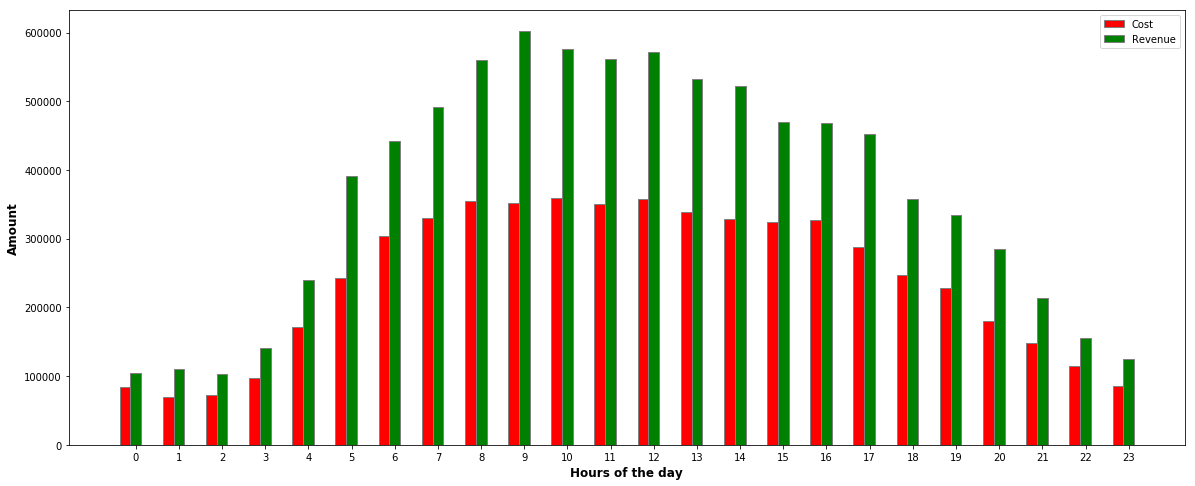

In [91]:
rev_list = []
cost_list = []
for hr in range(0,24):
    tcond1 = (df["hour"] == hr) 
    parev = df[tcond1]["partner_revenue"].sum()
    porev = df[tcond1]["policy_value"].sum()
    mcost = df[tcond1]["marketing_cost"].sum()
    rev_list.append(parev+porev)
    cost_list.append(mcost)

barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(rev_list))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, cost_list, color ='r', width = barWidth,
        edgecolor ='grey', label ='Cost')
plt.bar(br2, rev_list, color ='g', width = barWidth,
        edgecolor ='grey', label ='Revenue')

# Adding Xticks
plt.xlabel('Hours of the day', fontweight ='bold', fontsize = 12)
plt.ylabel('Amount', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(rev_list))],
        range(0,24))
 
plt.legend()
plt.show()

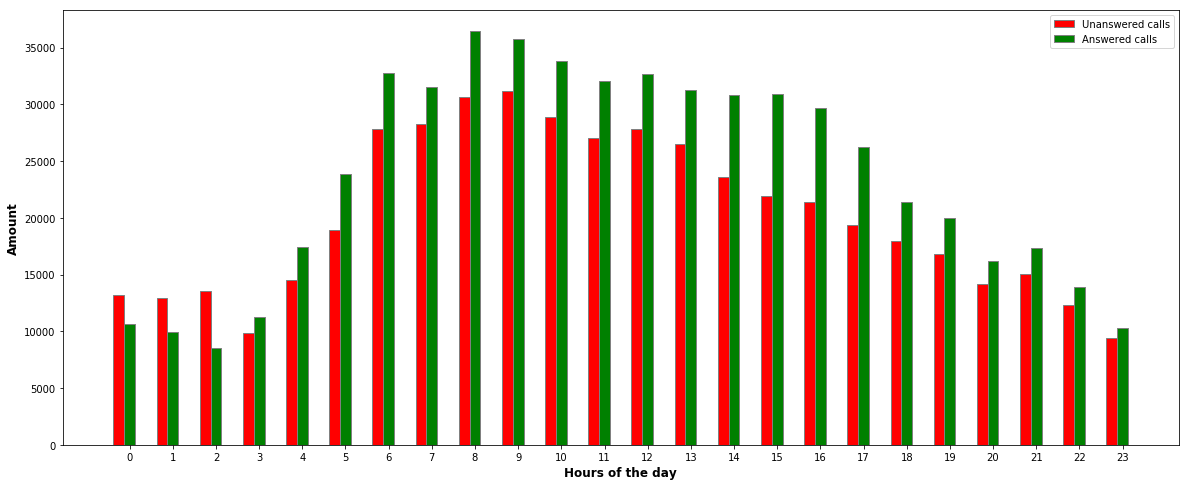

In [92]:
ans_list = []
uans_list = []
for hr in range(0,24):
    tcond1 = (df["hour"] == hr) 
    al = df[tcond1 & (df["number_calls_answered"]>=1)].shape[0]
    ul = df[tcond1 & (df["number_calls_answered"]==0)].shape[0]
    ans_list.append(al)
    uans_list.append(ul)

barWidth = 0.25
fig = plt.subplots(figsize =(20, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(ans_list))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, uans_list, color ='r', width = barWidth,
        edgecolor ='grey', label ='Unanswered calls')
plt.bar(br2, ans_list, color ='g', width = barWidth,
        edgecolor ='grey', label ='Answered calls')

# Adding Xticks
plt.xlabel('Hours of the day', fontweight ='bold', fontsize = 12)
plt.ylabel('Amount', fontweight ='bold', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(rev_list))],
        range(0,24))
 
plt.legend()
plt.show()